In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import torch
import torch.nn as nn

In [35]:
# !wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [36]:
df = pd.read_csv("moore.csv", header=None).values
df.shape

(162, 2)

In [37]:
type(df)

numpy.ndarray

In [38]:
x = df[:, 0].reshape(-1, 1)
y = df[:, 1].reshape(-1, 1)

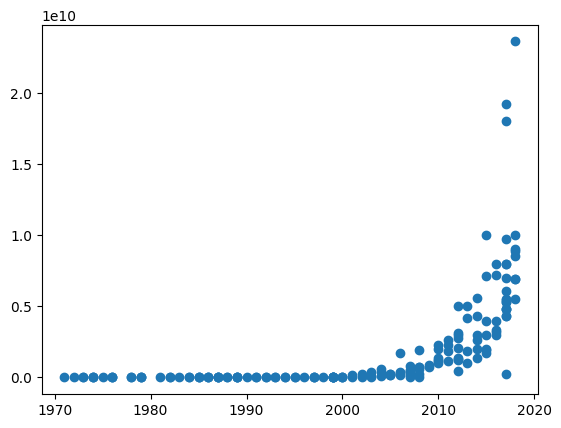

In [39]:
plt.scatter(x, y)

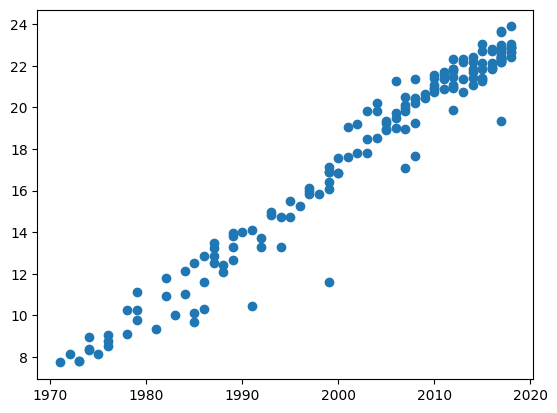

In [40]:
y = np.log(y)
plt.scatter(x, y)

In [41]:
mx = x.mean()
sx = x.std()
my = y.mean()
sy = y.std()

x = (x - mx) / sx
y = (y - my) / sy

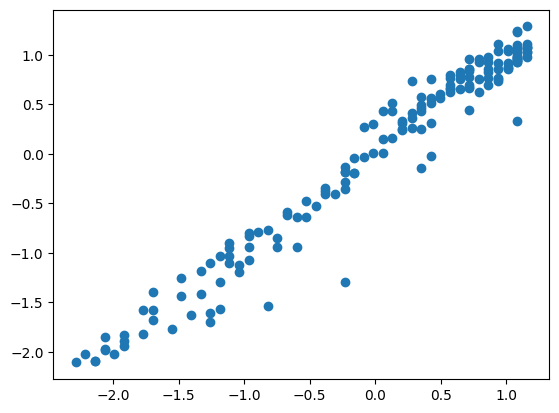

In [42]:
plt.scatter(x, y)

In [43]:
inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [44]:
model = nn.Linear(1, 1)

In [47]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [48]:
epochs = 100

losses = []

for i in range(epochs):
    optimizer.zero_grad()
    
    output = model(inputs)
    loss = criterion(output, targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {i + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.8977
Epoch 2/100, Loss: 0.8637
Epoch 3/100, Loss: 0.8081
Epoch 4/100, Loss: 0.7406
Epoch 5/100, Loss: 0.6683
Epoch 6/100, Loss: 0.5961
Epoch 7/100, Loss: 0.5270
Epoch 8/100, Loss: 0.4630
Epoch 9/100, Loss: 0.4049
Epoch 10/100, Loss: 0.3531
Epoch 11/100, Loss: 0.3074
Epoch 12/100, Loss: 0.2675
Epoch 13/100, Loss: 0.2329
Epoch 14/100, Loss: 0.2032
Epoch 15/100, Loss: 0.1777
Epoch 16/100, Loss: 0.1560
Epoch 17/100, Loss: 0.1375
Epoch 18/100, Loss: 0.1218
Epoch 19/100, Loss: 0.1086
Epoch 20/100, Loss: 0.0974
Epoch 21/100, Loss: 0.0879
Epoch 22/100, Loss: 0.0800
Epoch 23/100, Loss: 0.0733
Epoch 24/100, Loss: 0.0677
Epoch 25/100, Loss: 0.0630
Epoch 26/100, Loss: 0.0590
Epoch 27/100, Loss: 0.0557
Epoch 28/100, Loss: 0.0529
Epoch 29/100, Loss: 0.0505
Epoch 30/100, Loss: 0.0486
Epoch 31/100, Loss: 0.0469
Epoch 32/100, Loss: 0.0456
Epoch 33/100, Loss: 0.0444
Epoch 34/100, Loss: 0.0434
Epoch 35/100, Loss: 0.0426
Epoch 36/100, Loss: 0.0420
Epoch 37/100, Loss: 0.0414
Epoch 38/1

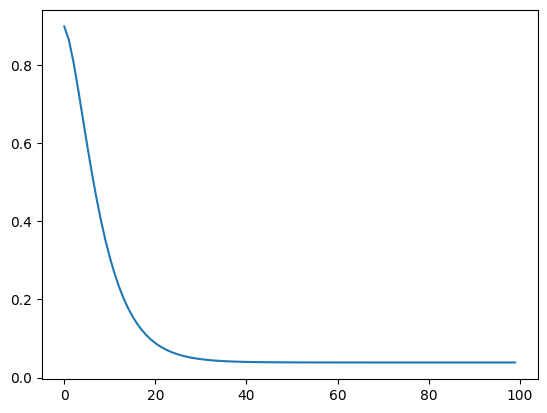

In [49]:
plt.plot(losses)

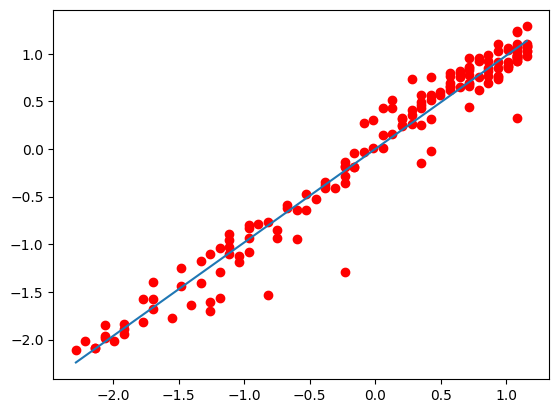

In [62]:
predicted = model(inputs).detach().numpy()
plt.scatter(x, y, c="red")
plt.plot(x, predicted)
plt.show()

In [65]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

In [66]:
print(w, b)

[[0.98041207]] [-8.6744134e-05]


In [69]:
a = w[0, 0] * sy / sx
r = np.exp(a)

In [73]:
print(r)   #rate of change in moore's law

1.407235390255527
